In [156]:
#Google Translate API
from translate import Translator
def translate_to_telegu(text):
    translator= Translator(to_lang="te")
    try:
        translation = translator.translate(text)
        return translation
    except Exception as e:
        return str(e)

# Example usage:
english_text = "Once there was a young woman named Vidya who lived in a village."
telegu_translation = translate_to_telegu(english_text)
print("English:", english_text)
print("telegu:", telegu_translation)


English: Once there was a young woman named Vidya who lived in a village.
telegu: ఒకప్పుడు విద్యా అనే యువతి ఒక గ్రామంలో నివసించింది.


Building a model based on Paninian Karaka Grammar Rules

In [157]:
def split_para(para):
  return para.split(".")


def verb_list(words):
  verbs=list()
  for word in words:
    if word in dict_vocab["Verb"]:
      verbs.append(word)
  return verbs


def finalWords(words):
  final_words=list()
  for word in words:
    if word in dict_vocab["Noun/Pronoun"] or word in dict_vocab["Verb"] or word in dict_vocab["Adjectives"] or word in dict_vocab["Adverb"] or word in dict_vocab["ConnectingWords"]:
      final_words.append(word)
  return final_words


def get_kartra():
  kartra=""
  for j in range(len(verbs)):
    pos=0
    pos=final_words.index(verbs[j])
    # print(pos)

    # print(final_words[pos-1])

    if pos !=0 and final_words[pos-1] in dict_vocab["Noun/Pronoun"] and kartra=="":
      kartra = final_words[pos-1]

  return kartra


def get_adhikarana():
  adhikarana=list()
  if words[0] == dict_vocab["Adverb"][0]:
    adhikarana.append(dict_vocab["Adverb"][0])
  if "in" in words:
    pos3=words.index("in")
    after_words=words[pos3+1:]
    for word2 in after_words:
      if word2 in dict_vocab["Noun/Pronoun"]:
        adhikarana.append(word2)
  else:
    adhikarana = []

  return adhikarana

dict_vocab = {"Noun/Pronoun":["Vidya", "village", "She", "world", "English","she", "village", "English", "course", "grammar", "vocabulary", "words", "classmates", "conversations", "confident", "country",  "cities", "people", "cultures", "English", "doors", "experiences", "Her", "journey", "determination", "learning", "anything"],
               "Verb": ["was","named","lived", "wanted","travel","explore","speak", "joined", "learned","pronounce", "practiced","talking", "understood", "felt","decided", "travel", "visited","talked", "realized","learning", "opened", "helped", "connect", "showed","is"],
               "Adjectives":["young","woman", "simple", "more", "alone", "english-speaking", "big", "local", "different", "new", "all-over", "possible"], "Adverb":["Once", "couldn't"],
               "ConnectingWords":["but", "So", "and"] }

akarmakaKriya=["was","lived", "talking", "travel","connect","is"]

articles = ["a", "an", "the"]
prepositions = ["in", "with", "to"]

para= "Once there was a young woman named Vidya who lived in a village. She wanted to travel and explore the world but she couldn't speak English. So she joined an English course in her village. Vidya learned grammar vocabulary and how to pronounce words. She practiced talking with her classmates and understood simple conversations. Vidya felt more confident and decided to travel alone to an english-speaking country. She visited big cities talked to local people and learned  about different cultures. Vidya realized that learning English opened doors to new experiences and helped her connect with people from all-over the world. Her journey showed that with determination and learning anything is possible"

str_inputSentence = split_para(para)

Kartra=dict()
Adhikarana=dict()
Kriya=dict()
Karma=dict()
list_final=[]
for i in range(9):
  # print(i+1, ".")

  words = str_inputSentence[i].split()
  verbs=verb_list(words)
  for word in verbs:
    list_final.append((word,'kriya'))
  # print("Kriya: ",verbs)
  Kriya[i+1]=verbs

  final_words = finalWords(words)

  kartra= get_kartra()
  list_final.append((word,'kartra'))
  # print("Kartra: ", kartra)
  Kartra[i+1]=kartra

  adhikarana= get_adhikarana()
  # print("Adhikarana: ",adhikarana)
  list_final.append((word,'adhikarana'))

  Adhikarana[i+1]=adhikarana
# print('Dataset: ',list_final)

Dataset:  [('was', 'kriya'), ('named', 'kriya'), ('lived', 'kriya'), ('lived', 'kartra'), ('lived', 'adhikarana'), ('wanted', 'kriya'), ('travel', 'kriya'), ('explore', 'kriya'), ('speak', 'kriya'), ('speak', 'kartra'), ('speak', 'adhikarana'), ('joined', 'kriya'), ('joined', 'kartra'), ('joined', 'adhikarana'), ('learned', 'kriya'), ('pronounce', 'kriya'), ('pronounce', 'kartra'), ('pronounce', 'adhikarana'), ('practiced', 'kriya'), ('talking', 'kriya'), ('understood', 'kriya'), ('understood', 'kartra'), ('understood', 'adhikarana'), ('felt', 'kriya'), ('decided', 'kriya'), ('travel', 'kriya'), ('travel', 'kartra'), ('travel', 'adhikarana'), ('visited', 'kriya'), ('talked', 'kriya'), ('learned', 'kriya'), ('learned', 'kartra'), ('learned', 'adhikarana'), ('realized', 'kriya'), ('learning', 'kriya'), ('opened', 'kriya'), ('helped', 'kriya'), ('connect', 'kriya'), ('connect', 'kartra'), ('connect', 'adhikarana'), ('showed', 'kriya'), ('learning', 'kriya'), ('is', 'kriya'), ('is', 'kartr

In [159]:
def get_karma(verbList,wordList,finalWorldList):
  Tag= True
  pos_but=pos_and=0
  pos_verb=0
  phrases=list()
  phrases.append(words)
  # print("sentence: ", words)
  for lists in phrases:
    for word in lists:
      if word == dict_vocab["ConnectingWords"][0]:
      # if word == "but":
        pos_but= words.index(dict_vocab["ConnectingWords"][0])
        # print(pos_but)
        phrases.append(words[:pos_but])
        phrases.append(words[pos_but+1:])
        phrases.pop(phrases.index(lists))
      if word == dict_vocab["ConnectingWords"][1]:
      # if word == "and":
        pos_and=words.index(dict_vocab["ConnectingWords"][1])
        # print(pos_and)
        phrases.append(words[:pos_and])
        for words2 in words[:pos_and]:
          if words2 in verbs:
            pos_verb=words.index(words2)
            # print(pos_verb)
        if pos_but!=0:
          words3= words[:pos_verb]+words[pos_and+1:pos_but]
        else:
          words3= words[:pos_verb]+words[pos_and+1:]

        phrases.append(words3)

    while Tag:
      for lists in phrases:
        if ("and" in lists) or ("but" in lists):
          lists=phrases.pop(phrases.index(lists))
          for word in lists:
            if word == dict_vocab["ConnectingWords"][0]:
            # if word == "but":
              pos_but= words.index(dict_vocab["ConnectingWords"][0])
              # print(pos_but)
              phrases.append(words[:pos_but])
              phrases.append(words[pos_but+1:])
              # phrases.pop(phrases.index(lists))
            if word == dict_vocab["ConnectingWords"][1]:
            # if word == "and":
              pos_and=words.index(dict_vocab["ConnectingWords"][1])
              # print(pos_and)
              phrases.append(words[:pos_and])
              for words2 in words[:pos_and]:
                if words2 in verbs:
                  pos_verb=words.index(words2)
                  # print(pos_verb)
              words3= words[:pos_verb]+words[pos_and+1:pos_but]
              phrases.append(words3)
        else:
          Tag = False
      if i==4:
        phrases[1]=phrases[1][:1]+phrases[1][2:]
      if i==8:
        phrases[0]=phrases[0]+words[8:]

  # print(phrases)
  final_phrases = []
  [final_phrases.append(x) for x in phrases if x not in final_phrases]
  # print("Phrases: ", final_phrases)

  karma=dict()
  for phrase in final_phrases:
    for word in phrase:
      if word in dict_vocab["Verb"] and word not in akarmakaKriya:
        pos_verb=phrase.index(word)
        # print(pos_verb)
        karma_temp= phrase[pos_verb+1:]
        if i==0:
          karma_temp= phrase[pos_verb+1:pos_verb+2]
        if i==8:
          karma_temp= phrase[pos_verb+1:]+words[6:8]+phrases[0][6:]
        if len(karma_temp)!=0:
          karma[word]=karma_temp
  return karma


dict_vocab = {"Noun/Pronoun":["Vidya", "village", "She", "world", "English","she", "village", "English", "course", "grammar", "vocabulary", "words", "classmates", "conversations", "confident", "country",  "cities", "people", "cultures", "English", "doors", "experiences", "Her", "journey", "determination", "learning", "anything"],
               "Verb": ["was","named","lived", "wanted","travel","explore","speak", "joined", "learned","pronounce", "practiced","talking", "understood", "felt","decided", "travel", "visited","talked", "realized", "opened", "helped", "connect", "showed","is"],
               "Adjectives":["young","woman", "simple", "more", "english-speaking", "big", "local", "different", "new", "possible"], "Adverb":["Once", "couldn't"],
               "ConnectingWords":["but", "and", "So"] }

para= "Once there was a young woman named Vidya who lived in a village. She wanted to travel and explore the world but she couldn't speak English. So she joined an English course in her village. Vidya learned grammar vocabulary and how to pronounce words. She practiced talking with her classmates and understood simple conversations. Vidya felt more confident and decided to travel alone to an english-speaking country. She visited big cities talked to local people and learned  about different cultures. Vidya realized that learning English opened doors to new experiences and helped her connect with people from all-over the world. Her journey showed that with determination and learning anything is possible"

str_inputSentence = split_para(para)

akarmakaKriya=["was","lived", "talking", "travel","connect","is"]
Karma= dict()
for i in range(9):
  # print(i+1, ".")
  verbs=list()
  words = str_inputSentence[i].split()
  for word in words:
    if word in dict_vocab["Verb"]:
      verbs.append(word)

  karma= get_karma(verbs, words, final_words)
  # print("Karma : ", karma)
  keys=karma.keys()
  for key in keys:
    for word in karma[key]:
      list_final.append((word,'karma'))

  Karma[i+1]=karma
  # print()

# print(Karma)

# print('Dataset :',list_final)

Dataset : [('was', 'kriya'), ('named', 'kriya'), ('lived', 'kriya'), ('lived', 'kartra'), ('lived', 'adhikarana'), ('wanted', 'kriya'), ('travel', 'kriya'), ('explore', 'kriya'), ('speak', 'kriya'), ('speak', 'kartra'), ('speak', 'adhikarana'), ('joined', 'kriya'), ('joined', 'kartra'), ('joined', 'adhikarana'), ('learned', 'kriya'), ('pronounce', 'kriya'), ('pronounce', 'kartra'), ('pronounce', 'adhikarana'), ('practiced', 'kriya'), ('talking', 'kriya'), ('understood', 'kriya'), ('understood', 'kartra'), ('understood', 'adhikarana'), ('felt', 'kriya'), ('decided', 'kriya'), ('travel', 'kriya'), ('travel', 'kartra'), ('travel', 'adhikarana'), ('visited', 'kriya'), ('talked', 'kriya'), ('learned', 'kriya'), ('learned', 'kartra'), ('learned', 'adhikarana'), ('realized', 'kriya'), ('learning', 'kriya'), ('opened', 'kriya'), ('helped', 'kriya'), ('connect', 'kriya'), ('connect', 'kartra'), ('connect', 'adhikarana'), ('showed', 'kriya'), ('learning', 'kriya'), ('is', 'kriya'), ('is', 'kartr

In [161]:
def get_adjectives(words):
  adjectives = dict()
  for word in words:
    pos_word=words.index(word)
    if word in dict_vocab["Adjectives"]:
      pos_adj=words.index(word)
      adj_words = words[pos_adj+1:]
      # print(adj_words)
      for word2 in adj_words:
        if word2 in dict_vocab["Noun/Pronoun"]:
          adjectives[word2]= [word]
          break
  return adjectives


str_inputSentence = split_para(para)
Adjectives = dict()
for i in range(9):
  # print(i+1, ".")

  words = str_inputSentence[i].split()
  # print(words)
  adjectives= get_adjectives(words)
  if i==5:
    adjectives[words[7:8][0]]=words[8:9]
  if i==0:
    adjectives[Kartra[1]]=words[4:6]
  # print(adjectives)
  keys=adjectives.keys()
  for key in keys:
    for word in adjectives[key]:
      list_final.append((word,'visheshana'))
  Adjectives[i+1] = adjectives



In [162]:
print('Dataset : ',list_final)

Dataset :  [('was', 'kriya'), ('named', 'kriya'), ('lived', 'kriya'), ('lived', 'kartra'), ('lived', 'adhikarana'), ('wanted', 'kriya'), ('travel', 'kriya'), ('explore', 'kriya'), ('speak', 'kriya'), ('speak', 'kartra'), ('speak', 'adhikarana'), ('joined', 'kriya'), ('joined', 'kartra'), ('joined', 'adhikarana'), ('learned', 'kriya'), ('pronounce', 'kriya'), ('pronounce', 'kartra'), ('pronounce', 'adhikarana'), ('practiced', 'kriya'), ('talking', 'kriya'), ('understood', 'kriya'), ('understood', 'kartra'), ('understood', 'adhikarana'), ('felt', 'kriya'), ('decided', 'kriya'), ('travel', 'kriya'), ('travel', 'kartra'), ('travel', 'adhikarana'), ('visited', 'kriya'), ('talked', 'kriya'), ('learned', 'kriya'), ('learned', 'kartra'), ('learned', 'adhikarana'), ('realized', 'kriya'), ('learning', 'kriya'), ('opened', 'kriya'), ('helped', 'kriya'), ('connect', 'kriya'), ('connect', 'kartra'), ('connect', 'adhikarana'), ('showed', 'kriya'), ('learning', 'kriya'), ('is', 'kriya'), ('is', 'kart

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample dataset (replace with your own labeled data)
data = list_final

# Split data into features (X) and target labels (y)
X = [item[0] for item in data]
y = [item[1] for item in data]

# Encode target labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert words to numerical features and reshape them
word_to_index = {word: index for index, word in enumerate(set(X))}
X_train_encoded = [word_to_index[word] for word in X_train]
X_test_encoded = [word_to_index[word] for word in X_test]
# ...
# (Previous code remains the same)

# Convert words to numerical features and reshape them
X_train_encoded = np.array(X_train_encoded).reshape(-1, 1)
X_test_encoded = np.array(X_test_encoded).reshape(-1, 1)

# (Rest of the code remains the same)
# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_encoded, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Classifier Accuracy:", accuracy)

# Use the trained classifier to predict Karaka structures for new words
new_word = "Vidya"
new_word_encoded = word_to_index.get(new_word, None)
if new_word_encoded is not None:
    # Reshape the input for prediction to be a 2D array
    new_word_encoded = np.array(new_word_encoded).reshape(1, -1)
    predicted_karaka_encoded = classifier.predict(new_word_encoded)
    predicted_karaka = label_encoder.inverse_transform(predicted_karaka_encoded)[0]
    print(f"Predicted Karaka for '{new_word}': {predicted_karaka}")
else:
    print(f"'{new_word}' not found in the dictionary.")


Classifier Accuracy: 0.6153846153846154
Predicted Karaka for 'Vidya': karma


In [136]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Sample dataset (replace with your own labeled data)
data1 = list_final

data = []
seen_words = set()

for word, karaka in data1:
    if word not in seen_words:
        data.append((word, karaka))
        seen_words.add(word)
# Split data into features (X) and target labels (y)
X = [item[0] for item in data]
y = [item[1] for item in data]

# Encode target labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert words to numerical features (You may use word embeddings or other techniques)
# For simplicity, we'll use a simple word-to-index mapping
word_to_index = {word: index for index, word in enumerate(set(X))}
X_train_encoded = [word_to_index[word] for word in X_train]
X_test_encoded = [word_to_index[word] for word in X_test]

# ...
# (Previous code remains the same)

# Convert words to numerical features and reshape them
X_train_encoded = np.array(X_train_encoded).reshape(-1, 1)
X_test_encoded = np.array(X_test_encoded).reshape(-1, 1)

# Train an SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_encoded, y_train)

# (Rest of the code remains the same)


# Evaluate the classifier
y_pred = classifier.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Classifier Accuracy:", accuracy)

new_word = "Vidya"
new_word_encoded = word_to_index.get(new_word, None)
if new_word_encoded is not None:
    # Reshape the input for prediction to be a 2D array
    new_word_encoded = np.array(new_word_encoded).reshape(1, -1)
    predicted_karaka_encoded = classifier.predict(new_word_encoded)
    predicted_karaka = label_encoder.inverse_transform(predicted_karaka_encoded)[0]
    print(f"Predicted Karaka for '{new_word}': {predicted_karaka}")
else:
    print(f"'{new_word}' not found in the dictionary.")

Classifier Accuracy: 0.6153846153846154
Predicted Karaka for 'Vidya': karma


In [149]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample dataset (replace with your own labeled data)
data1 = list_final

data = []
seen_words = set()

for word, karaka in data1:
    if word not in seen_words:
        data.append((word, karaka))
        seen_words.add(word)

# print(unique_data)

# Split data into features (X) and target labels (y)
X = [item[0] for item in data]
y = [item[1] for item in data]

# Encode target labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize and vectorize the text data (you may need a more advanced method)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=7)

# Build and compile the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_vectorized.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy[1]:.4f}")


Epoch 1/50
4/4 - 1s - loss: 1.5792 - accuracy: 0.1923 - 994ms/epoch - 249ms/step
Epoch 2/50
4/4 - 0s - loss: 1.5160 - accuracy: 0.5577 - 16ms/epoch - 4ms/step
Epoch 3/50
4/4 - 0s - loss: 1.4512 - accuracy: 0.5962 - 12ms/epoch - 3ms/step
Epoch 4/50
4/4 - 0s - loss: 1.3946 - accuracy: 0.5962 - 16ms/epoch - 4ms/step
Epoch 5/50
4/4 - 0s - loss: 1.3387 - accuracy: 0.5962 - 13ms/epoch - 3ms/step
Epoch 6/50
4/4 - 0s - loss: 1.2787 - accuracy: 0.5962 - 13ms/epoch - 3ms/step
Epoch 7/50
4/4 - 0s - loss: 1.2189 - accuracy: 0.5962 - 14ms/epoch - 4ms/step
Epoch 8/50
4/4 - 0s - loss: 1.1563 - accuracy: 0.5962 - 14ms/epoch - 3ms/step
Epoch 9/50
4/4 - 0s - loss: 1.0989 - accuracy: 0.5962 - 14ms/epoch - 4ms/step
Epoch 10/50
4/4 - 0s - loss: 1.0467 - accuracy: 0.5962 - 14ms/epoch - 4ms/step
Epoch 11/50
4/4 - 0s - loss: 1.0063 - accuracy: 0.5962 - 16ms/epoch - 4ms/step
Epoch 12/50
4/4 - 0s - loss: 0.9690 - accuracy: 0.5962 - 26ms/epoch - 6ms/step
Epoch 13/50
4/4 - 0s - loss: 0.9347 - accuracy: 0.5962 - 1

In [135]:
import nltk
import random
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy

# Define a simplified dataset with English words and their Karaka structures
# Replace this dataset with your labeled data
data = list_final

dataset = []
seen_words = set()

for word, karaka in data:
    if word not in seen_words:
        dataset.append((word, karaka))
        seen_words.add(word)
# Shuffle the dataset
random.shuffle(dataset)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
train_data = dataset[:train_size]
test_data = dataset[train_size:]

# Define a feature extractor function to extract features from words (you can use more sophisticated features)
def extract_features(word):
    return {"word": word}

# Transform the training and testing data into the required format
train_features = [(extract_features(word), karaka) for word, karaka in train_data]
test_features = [(extract_features(word), karaka) for word, karaka in test_data]
# Train a Naive Bayes Classifier
classifier = NaiveBayesClassifier.train(train_features)

# Evaluate the classifier on the testing data
accuracy_score = accuracy(classifier, test_features)

print("Classifier Accuracy:", accuracy_score)

# Use the trained classifier to predict Karaka structures for new words
new_word = "Vidya"  # Replace with the word you want to predict
predicted_karaka = classifier.classify(extract_features(new_word))
print(f"Predicted Karaka for '{new_word}': {predicted_karaka}")

Classifier Accuracy: 0.7692307692307693
Predicted Karaka for 'Vidya': karma


Once there was a young woman named Vidya who lived in a village.


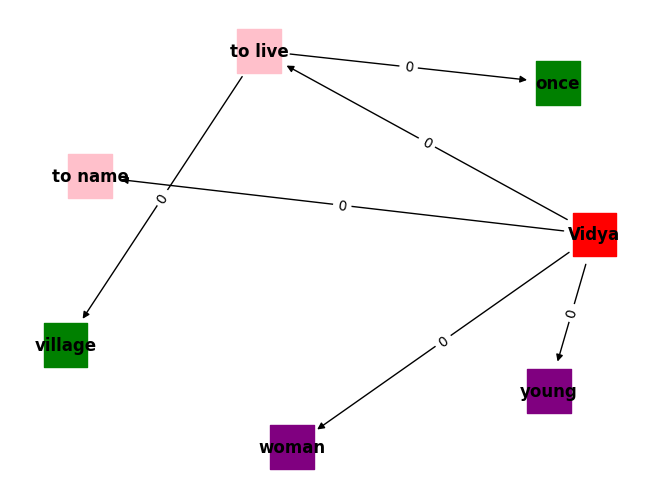

She wanted to travel and explore the world, but she couldn't speak English. 


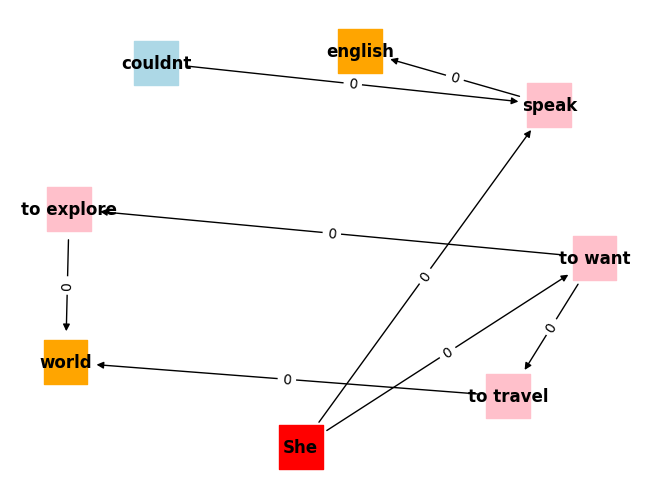

So, she joined an English course in her village.


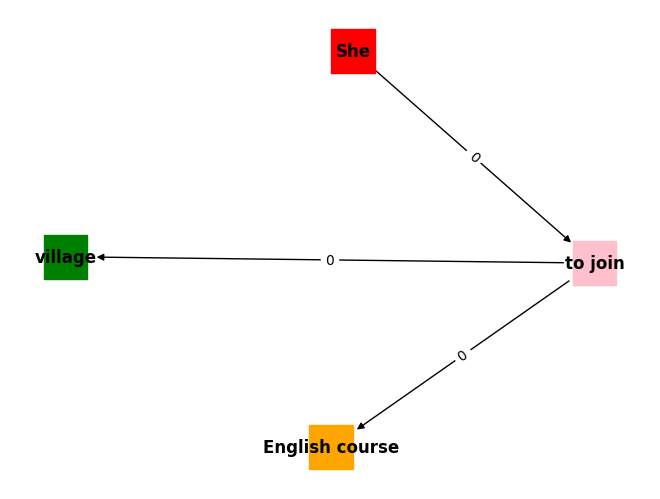

Vidya learned grammar, vocabulory and how to prnounce words


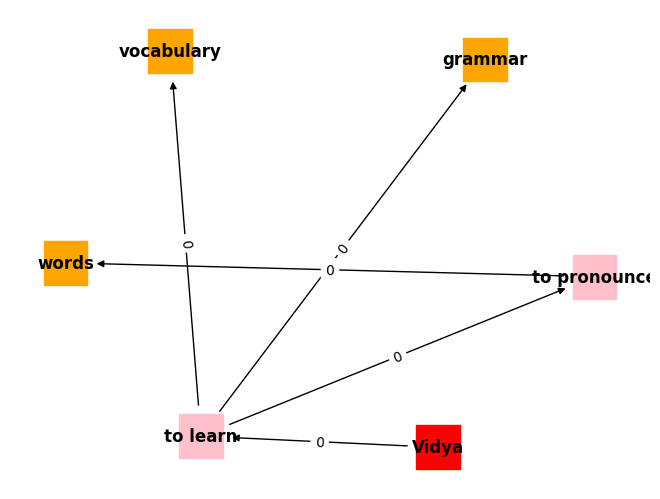

She practiced talking with her classmates and understood simple conversations.


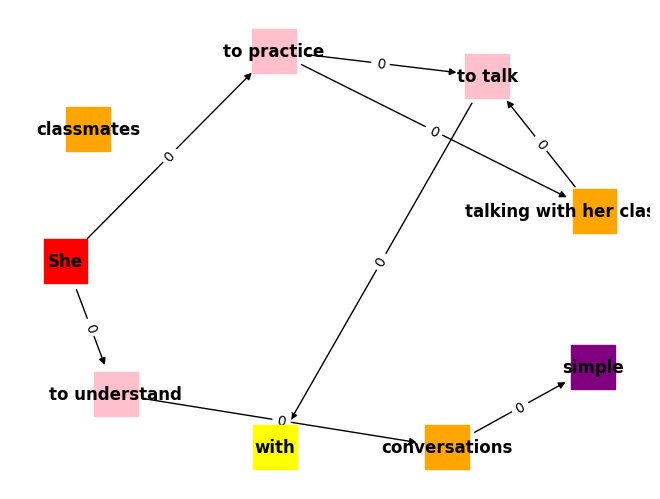

Vidya felt more confident and decided to travel alone to an English-speaking country.


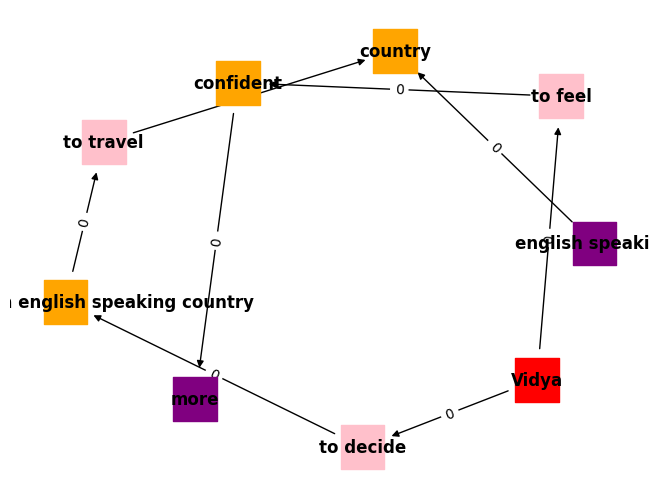

She visited big cities, talked to local people, and learned about different cultures.


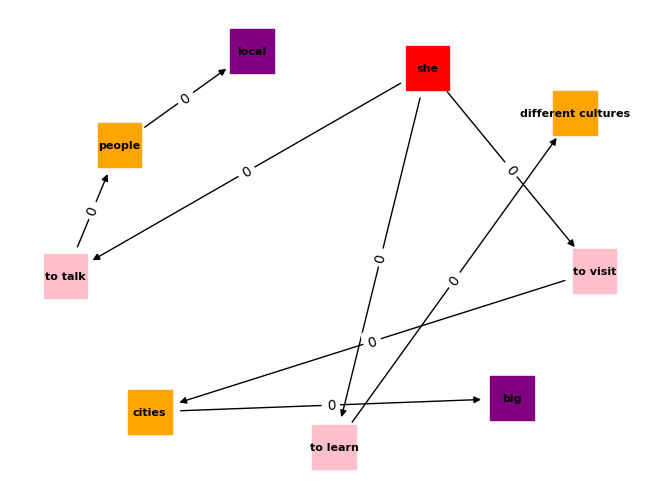

Vidya realized that learning English opened doors to new experiences and helped her connect with people from all over the world


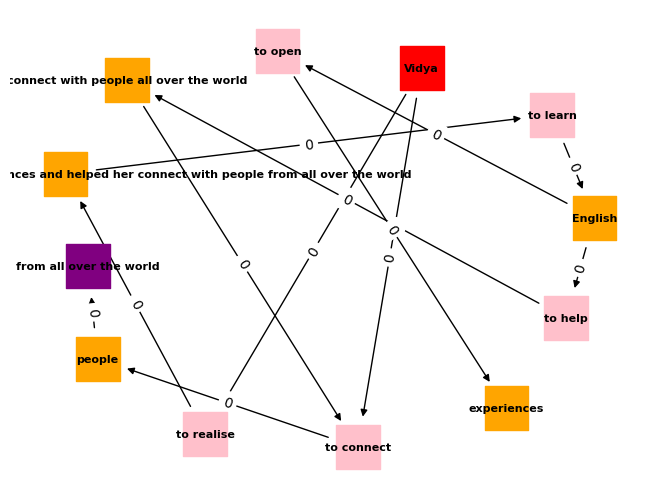

Her journey showed that with determination and learning anything is possible


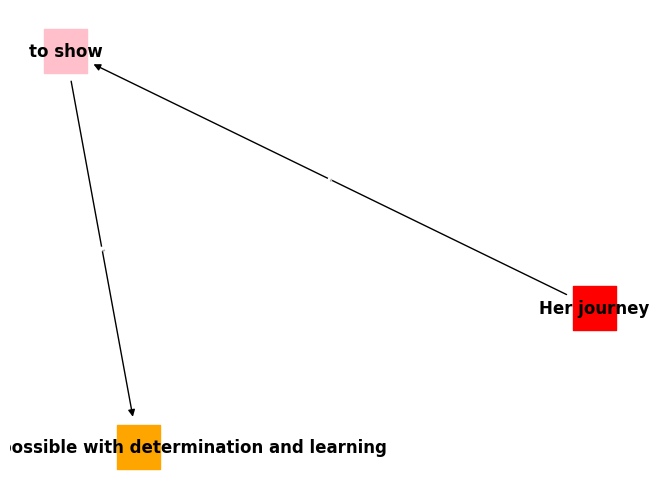

In [151]:
import networkx as nx
import matplotlib.pyplot as plt

#1

print("Once there was a young woman named Vidya who lived in a village.")

# Create an empty directed graph
G = nx.DiGraph()

# nodes to the graph
G.add_node(1, label='Vidya')
G.add_node(2, label='to live')
G.add_node(3, label='to name')
G.add_node(4, label='young')
G.add_node(5, label='woman')
G.add_node(6, label='once')
G.add_node(7, label='village')

# edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(1, 3, weight=0)
G.add_edge(1, 4, weight=0)
G.add_edge(1, 5, weight=0)
G.add_edge(2, 6, weight=0)
G.add_edge(2, 7, weight=0)

# edge weights
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

#COLORS
# Katre: RED
# Adhikarna: PINK
# Kria: ORANGE
# Karma: GREEN
# adjective: PURPLE

node_colors = {'Vidya': 'red', 'to live': 'pink','to name':'pink','young':'purple','woman':'purple','once':'green','village':'green'}

pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=12, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()

#2

print("She wanted to travel and explore the world, but she couldn't speak English. ")
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node(1, label='She')
G.add_node(2, label='to want')
G.add_node(3, label='to explore')
G.add_node(4, label='to travel')
G.add_node(5, label='world')
G.add_node(7, label='speak')
G.add_node(8, label='couldnt')
G.add_node(9, label='english')

# Add weighted edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(2, 3, weight=0)
G.add_edge(2, 4, weight=0)
G.add_edge(3, 5, weight=0)
G.add_edge(4, 5, weight=0)
G.add_edge(1, 7, weight=0)
G.add_edge(8, 7, weight=0)
G.add_edge(7, 9, weight=0)


# Get the edge weights and create a dictionary
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

# Specify colors for specific nodes
#node_colors = {'Vidya': 'red', 'to live': 'pink','to name':'pink','young':'purple','woman':'purple','once':'green','village':'green'}
node_colors={'She': 'red', 'speak': 'pink', 'to travel': 'pink', 'to want' : 'pink', 'english': 'orange', 'couldnt speak english':'pink','to explore':'pink','couldnt':'lightblue','world':'orange'}

# Draw the directed graph with labels and colored nodes and edges
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=12, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()

#3

print("So, she joined an English course in her village.")

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node(1, label='She')
G.add_node(2, label='to join')
G.add_node(3, label='English course')
G.add_node(4, label='village')

# Add weighted edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(2, 3, weight=0)
G.add_edge(2, 4, weight=0)


# Get the edge weights and create a dictionary
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

# Specify colors for specific nodes
node_colors = {'She': 'red', 'to join': 'pink','English course':'orange','village':'green'}

# Draw the directed graph with labels and colored nodes and edges
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=12, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()

#4

print("Vidya learned grammar, vocabulory and how to prnounce words")
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node(1, label='Vidya')
G.add_node(2, label='to learn')
G.add_node(3, label='grammar')
G.add_node(4, label='vocabulary')
G.add_node(5, label='to pronounce')
G.add_node(6, label='words')


# Add weighted edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(2, 3, weight=0)
G.add_edge(2, 4, weight=0)
G.add_edge(2, 5, weight=0)
G.add_edge(5, 6, weight=0)



# Get the edge weights and create a dictionary
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

# Specify colors for specific nodes
node_colors = {'Vidya':'red' , 'to learn':'pink' , 'grammar':'orange' , 'vocabulary':'orange' , 'to pronounce':'pink' , 'words':'orange'}

# Draw the directed graph with labels and colored nodes and edges
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=12, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()


#5
print("She practiced talking with her classmates and understood simple conversations.")
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node(1, label='She')
G.add_node(2, label='to practice')
G.add_node(3, label='talking with her classmates')
G.add_node(4, label='to talk')
G.add_node(5, label='with')
G.add_node(6, label='classmates')
G.add_node(7, label='to understand')
G.add_node(8, label='conversations')
G.add_node(9, label='simple')



# Add weighted edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(2, 3, weight=0)
G.add_edge(2, 4, weight=0)
G.add_edge(3, 4, weight=0)
G.add_edge(4, 5, weight=0)
G.add_edge(1, 7, weight=0)
G.add_edge(7, 8, weight=0)
G.add_edge(8, 9, weight=0)


# Get the edge weights and create a dictionary
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

# Specify colors for specific nodes
node_colors = {'She':'red' , 'to practice':'pink', 'talking with her classmates':'orange' , 'to talk':'pink' , 'with':'yellow' , 'classmates':'orange' , 'to understand':'pink' ,  'conversations':'orange' , 'simple':'purple' }

# Draw the directed graph with labels and colored nodes and edges
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=12, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()




#6
print("Vidya felt more confident and decided to travel alone to an English-speaking country.")
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node(1, label='Vidya')
G.add_node(2, label='to feel')
G.add_node(3, label='confident')
G.add_node(4, label='more')

G.add_node(5, label='to decide')
G.add_node(6, label='to travel to an english speaking country')
G.add_node(7, label='to travel')
G.add_node(8, label='country')
G.add_node(9, label='english speaking')



# Add weighted edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(2, 3, weight=0)
G.add_edge(3, 4, weight=0)

G.add_edge(1, 5, weight=0)
G.add_edge(5, 6, weight=0)
G.add_edge(6, 7, weight=0)
G.add_edge(7, 8, weight=0)
G.add_edge(9, 8, weight=0)



# Get the edge weights and create a dictionary
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

# Specify colors for specific nodes
node_colors = {'Vidya':'red' ,'to feel':'pink' , 'confident':'orange' , 'more':'purple' , 'to decide':'pink' , 'to travel to an english speaking country':'orange' , 'to travel':'pink' , 'country': 'orange' , 'english speaking':'purple' }

# Draw the directed graph with labels and colored nodes and edges
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=12, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()


#7
print("She visited big cities, talked to local people, and learned about different cultures.")
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node(1, label='she')
G.add_node(2, label='to visit')
G.add_node(3, label='to talk')
G.add_node(4, label='to learn')

G.add_node(5, label='cities')
G.add_node(6, label='big')

G.add_node(7, label='people')
G.add_node(8, label='local')

G.add_node(9, label='different cultures')




# Add weighted edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(1, 3, weight=0)
G.add_edge(1, 4, weight=0)
G.add_edge(2, 5, weight=0)
G.add_edge(5, 6, weight=0)
G.add_edge(3, 7, weight=0)
G.add_edge(7, 8, weight=0)
G.add_edge(4, 9, weight=0)




# Get the edge weights and create a dictionary
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

# Specify colors for specific nodes
node_colors = {'she': 'red', 'to visit': 'pink','to talk':'pink','big':'purple','local':'purple','different cultures':'orange','to learn':'pink','cities':'orange','people':'orange'}

# Draw the directed graph with labels and colored nodes and edges
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=8, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()




#8
print("Vidya realized that learning English opened doors to new experiences and helped her connect with people from all over the world")

import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_node(1, label='Vidya')
G.add_node(2, label='to realise')
G.add_node(3, label='learning English opened doors to new experiences and helped her connect with people from all over the world')
G.add_node(4, label='to learn')

G.add_node(5, label='English')
G.add_node(6, label='to open')

G.add_node(7, label='experiences')
G.add_node(8, label='to help')

G.add_node(9, label='connect with people all over the world')
G.add_node(10, label='to connect')
G.add_node(11, label='people')
G.add_node(12, label='from all over the world')





# Add weighted edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(2, 3, weight=0)
G.add_edge(3, 4, weight=0)
G.add_edge(4, 5, weight=0)
G.add_edge(5, 6, weight=0)
G.add_edge(5, 8, weight=0)
G.add_edge(6, 7, weight=0)
G.add_edge(8, 9, weight=0)
G.add_edge(9, 10, weight=0)
G.add_edge(10,11 , weight=0)
G.add_edge(11, 12, weight=0)
G.add_edge(1, 10, weight=0)



# Get the edge weights and create a dictionary
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

# Specify colors for specific nodes
node_colors = {'Vidya':'red','to realise':'pink' , 'learning English opened doors to new experiences and helped her connect with people from all over the world':'orange' , 'to learn':'pink' , 'English':'orange', 'to open':'pink' , 'experiences':'orange', 'to help': 'pink' , 'connect with people all over the world':'orange' , 'to connect':'pink', 'people':'orange' , 'from all over the world':'purple' }

# Draw the directed graph with labels and colored nodes and edges
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=8, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')
plt.show()


#9
print("Her journey showed that with determination and learning anything is possible")
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# nodes to the graph
G.add_node(1, label='Her journey')
G.add_node(2, label='to show')
G.add_node(3, label='anything is possible with determination and learning')


# edges to the graph
G.add_edge(1, 2, weight=0)
G.add_edge(2, 3, weight=0)


# edge weights
edge_labels = {(source, target): G[source][target]['weight'] for source, target in G.edges}

#colors
node_colors = {'Her journey': 'red', 'to show': 'pink' , 'anything is possible with determination and learning': 'orange'}

pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes}, node_color=[node_colors.get(G.nodes[node]['label'], 'lightgray') for node in G.nodes], node_size=1000, font_size=12, font_weight='bold', node_shape='s')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=2, font_color='black')
plt.show()



In [154]:
from indicnlp.tokenize import indic_tokenize
from translate import Translator

translator = Translator(from_lang="te", to_lang="en")

# Sample telegu sentence
telegu_sentence = "ఒకప్పుడు విద్య పెరు యువతీ గ్రామం లో ఉండేది "

# Tokenize the telegu sentence
telegu_tokens = indic_tokenize.trivial_tokenize(telegu_sentence)

# Display the tokenized words
print("Tokenized Words:", telegu_tokens)
translated_words=[]
for word in telegu_tokens:
    translation = translator.translate(word)
    translated_words.append(translation)

print(translated_words)

Tokenized Words: ['ఒకప్పుడు', 'విద్య', 'పెరు', 'యువతీ', 'గ్రామం', 'లో', 'ఉండేది']
['Once upon a time', 'Education', 'Peru', 'Youth', 'Village', 'in', 'would have been']


In [152]:
s_t={1: {'Once':'ఒకప్పుడు','Vidya':'విద్య','named':'పెరునా','woman':'యువతీ','village':'గ్రామం లో','lived':'ఉండేది'},
     2: {'She':'ఆమె','world':'ప్రపంచాన్ని','travel':'ప్రయాణించాలని','explore':'అన్వేషణాత్మక డ్రైవ్','wanted':'కోరుకుంది కానీ','English':'ఆంగ్లం లో','speak':'మాట్లాడలేదు'},
     3: {'So':'అందుకే','she':'ఆమె','village':'గ్రామములో','English':'ఆంగ్లము','course':'కోర్సెలో','joined':'చేరింద'},
     4:{'Vidya':'విద్య' , 'grammar':'వ్యాకరణం' , 'vocabulary':'పాద జలం','pronounce':'ఉచ్చరణము' , 'learned':'నేర్చుకుంది'},
     5:{'She':'ఆమె' , 'classmates':'సెహపతులతో' , 'talking':'మాటలాడటం' , 'practiced':'సదన చేసి' , 'simple':'సాధారణ' , 'conversations' : 'సాంబసులని' , 'understood' : 'అర్దం చేసుకుంటుంది' },
     6: {'Vidya':'విద్య','confident':' నమ్మకంగా','felt':'భావించి','english-speaking country':'ఆంగ్లము మాట్లాడే దేశానికి','alone':'ఒకటే','travel':'ప్రయాణించాలన్నారు','decided':'నిర్ణయించుకుంది'},
     7: {'She':'ఆమె','big':'పెద్ద','cities':'నగరాలకు','visited':'వెల్లి','local':'స్థానిక','people':'ప్రజాలుతో','talked':'మాటలాడి','different':'విభిన్న','cultures':'సంస్కృతాల','learned':'గురించీ నేర్చుకుంది'},
     8:{'English':'ఆంగ్లము','learning':'నేర్చుకోవడం తో','new':'కొత్త','experiences':'అనుభవాలకి','doors':'తలుపులు','opened':'తేరుసుకుంటాయని','world':'ప్రపంశవ్యాప్తంగా ఉన్నా','people':'వ్యక్తులతో','connect':'మాటలడొచ్చు అని','Vidya':'విద్య','realized':'తెలుసుకుంద'},
     9:{'journey':'ఆమె ప్రయాణం','showed':'నిరూపించింద్ ','determination':'సంకల్పముతో ','learning':'నేర్చుకోవడంతో','anything':'ఎదైనా','possible':'సాధ్యం'}
     }
s_e={1:{'Once':'okapudu','Vidya':'vidya','named':'peruna','woman':'yuvati','village':'gramamlo','lived':'undedi'},
     2:{'She':'ame','world':'prapanshani','travel':'prayaninchalani','explore':'anveshinchalani','wanted':'korukundi kani','English':'anglamu','speak':'mataladaledu'},
     3:{'So':'ame','she':'prapanshani','village':'prayaninchalani','English':'anveshinchalani','course':'korukundi kani','joined':'anglamu'},
     4:{'Vidya':'vidya' , 'grammar':'vyakaranam' , 'vocabulary':'padajaalam' , 'pronounce' :'ucharanam' , 'learned':'nerchukundi'},
     5:{'She':'ame' , 'classmates':'sehpatulato' , 'talking':'mataladadam' , 'practiced':'sadana chesi' , 'simple':'saadharana' , 'conversations' : 'sambasulani' , 'understood' : 'ardam chesukundi' },
     6:{'Vidya':'vidya','confident':'nammakanga','felt':'bhavinchi','english-speaking country':'anglamu matlade desaniki','alone':'okate ','travel':'prayaninchalani','decided':'nirnayinchukundi'},
     7:{'She':'ame','big':'peda','cities':'nagaralaku','visited':' veli','local':'sthanika','people':'prajalutho','talked':'mataladi','different':'vibhinna','cultures':'sanskrutala','learned':'gurinchi nerchukundi'},
     8:{'English':'anglamu','learning':'nerchukovadam tho','new':'kotha','experiences':'anubhavalaki','doors':'thalupulu','opened':'therusukuntayani','world':'prapanshavyaptanga unna','people':'vyakthulatho','connect':'mataladochu ani','Vidya':'vidya','realized':'telusukundi'},
     9:{'journey':'ame prayanam','showed':'nirupinchindi','determination':'sankalpamutho','learning':'nerchukovadamtho','anything':'edaina','possible':'saadhyam'}}

In [165]:
sentence1=[Adhikarana[1][0], Kartra[1], Kriya[1][1], Adjectives[1][Kartra[1]][1], Adhikarana[1][1], Kriya[1][2]]
sentence2=[Kartra[2], Karma[2][Kriya[2][2]][1], Kriya[2][1], Kriya[2][2], Kriya[2][0], Karma[2][Kriya[2][3]][0], Kriya[2][3]]
sentence3=[dict_vocab["ConnectingWords"][2], Kartra[3], Adhikarana[3][0], Karma[3][Kriya[3][0]][1], Karma[3][Kriya[3][0]][2], Kriya[3][0]]
sentence4=[Kartra[4], Karma[4][Kriya[4][0]][0], Karma[4][Kriya[4][0]][1], Kriya[4][1], Kriya[4][0]]
sentence5=[Kartra[5],Karma[5][Kriya[5][0]][3], Kriya[5][1], Kriya[5][0], Karma[5][Kriya[5][2]][0], Karma[5][Kriya[5][2]][1], Kriya[5][2]]
sentence6=[Kartra[6],Karma[6][Kriya[6][0]][1], Kriya[6][0], Karma[6][Kriya[6][1]][5]+" "+Karma[6][Kriya[6][1]][6], Adjectives[6][Kriya[6][2]][0], Kriya[6][2], Kriya[6][1]]
sentence7=[Kartra[7], Karma[7][Kriya[7][0]][0],Karma[7][Kriya[7][0]][1], Kriya[7][0],Karma[7][Kriya[7][1]][1], Karma[7][Kriya[7][1]][2], Kriya[7][1],Karma[7][Kriya[7][2]][1], Karma[7][Kriya[7][2]][2], Kriya[7][2]]
sentence8=[Karma[8][Kriya[8][0]][2], Karma[8][Kriya[8][0]][1], Karma[8][Kriya[8][2]][2], Karma[8][Kriya[8][2]][3], Karma[8][Kriya[8][2]][0], Kriya[8][2], Karma[8][Kriya[8][3]][7], Karma[8][Kriya[8][3]][3], Karma[8][Kriya[8][3]][1], Kartra[8], Kriya[8][0]]
sentence9=[Kartra[9], Kriya[9][0], Karma[9][Kriya[9][0]][2],Kriya[9][1], Karma[9][Kriya[9][0]][5], Karma[9][Kriya[9][0]][7]]

sentence={1:sentence1, 2:sentence2, 3:sentence3, 4:sentence4, 5:sentence5, 6:sentence6, 7:sentence7, 8:sentence8, 9:sentence9}

In [168]:
def make_str(lst):
  sen=""
  for word in lst:
    sen=sen+word+" "
  return sen

Final=dict()

for i in range(9):
  t_sen=list()
  e_sen=list()
  t_sen_f=""
  e_sen_f=""
  for j in sentence[i+1]:
    t_sen.append(s_t[i+1][j])
    e_sen.append(s_e[i+1][j])
  t_sen_f =make_str(t_sen)
  e_sen_f= make_str(e_sen)
  print(t_sen_f)
  print(e_sen_f)
  Final[i]=[t_sen,e_sen]


ఒకప్పుడు విద్య పెరునా యువతీ గ్రామం లో ఉండేది 
okapudu vidya peruna yuvati gramamlo undedi 
ఆమె ప్రపంచాన్ని ప్రయాణించాలని అన్వేషణాత్మక డ్రైవ్ కోరుకుంది కానీ ఆంగ్లం లో మాట్లాడలేదు 
ame prapanshani prayaninchalani anveshinchalani korukundi kani anglamu mataladaledu 
అందుకే ఆమె గ్రామములో ఆంగ్లము కోర్సెలో చేరింద 
ame prapanshani prayaninchalani anveshinchalani korukundi kani anglamu 
విద్య వ్యాకరణం పాద జలం ఉచ్చరణము నేర్చుకుంది 
vidya vyakaranam padajaalam ucharanam nerchukundi 
ఆమె సెహపతులతో మాటలాడటం సదన చేసి సాధారణ సాంబసులని అర్దం చేసుకుంటుంది 
ame sehpatulato mataladadam sadana chesi saadharana sambasulani ardam chesukundi 
విద్య  నమ్మకంగా భావించి ఆంగ్లము మాట్లాడే దేశానికి ఒకటే ప్రయాణించాలన్నారు నిర్ణయించుకుంది 
vidya nammakanga bhavinchi anglamu matlade desaniki okate  prayaninchalani nirnayinchukundi 
ఆమె పెద్ద నగరాలకు వెల్లి స్థానిక ప్రజాలుతో మాటలాడి విభిన్న సంస్కృతాల గురించీ నేర్చుకుంది 
ame peda nagaralaku  veli sthanika prajalutho mataladi vibhinna sanskrutala gurinchi nerchukundi 
